# Seaborn

## Distribution Plots

In [8]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips') # Built-in dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. displot
Shows the distribution of a univariate set of observations


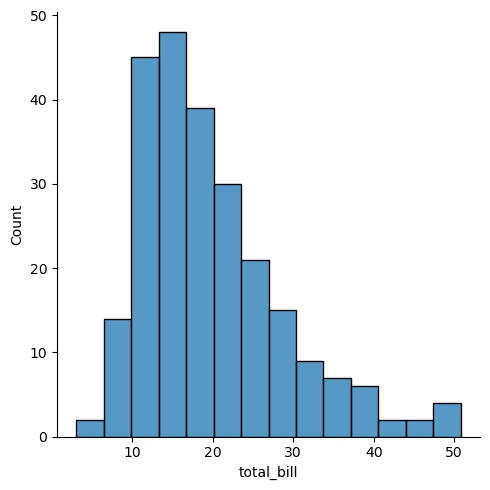

In [4]:
sns.displot(tips['total_bill'])

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

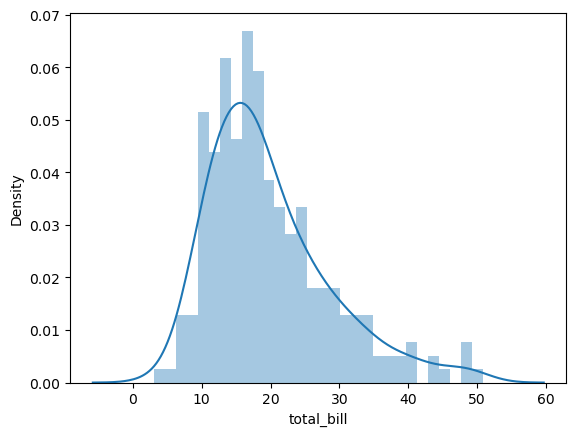

In [10]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

### jointplot
Basically match up two displots for bivariate data. With your choice of what kind of parameter to compare with:

"scatter","reg","resid","kde","hex"

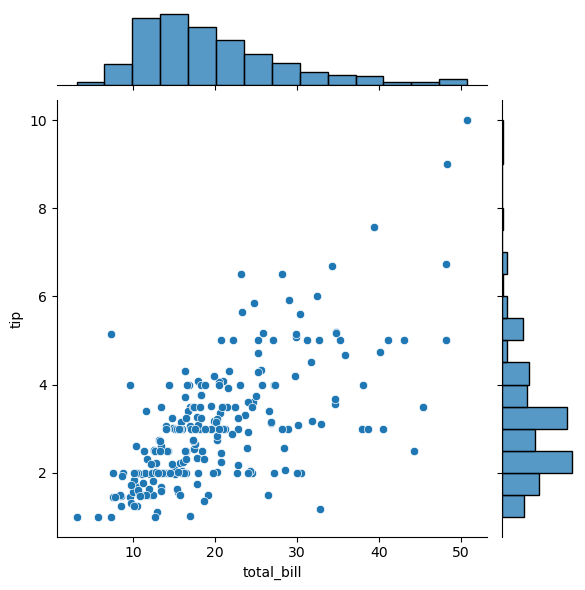

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')



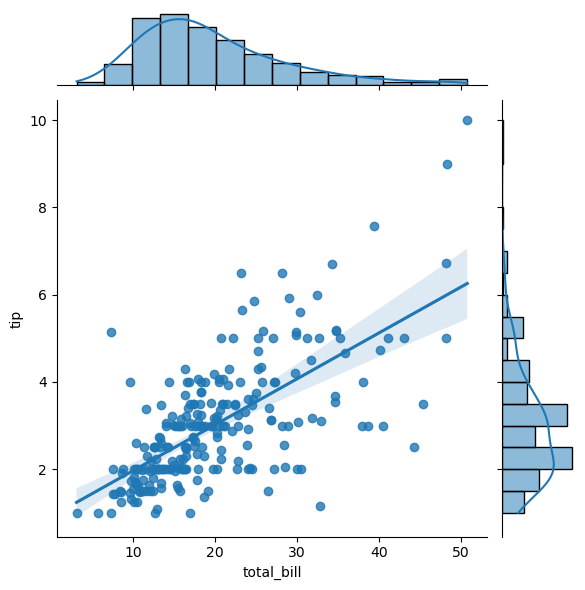

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

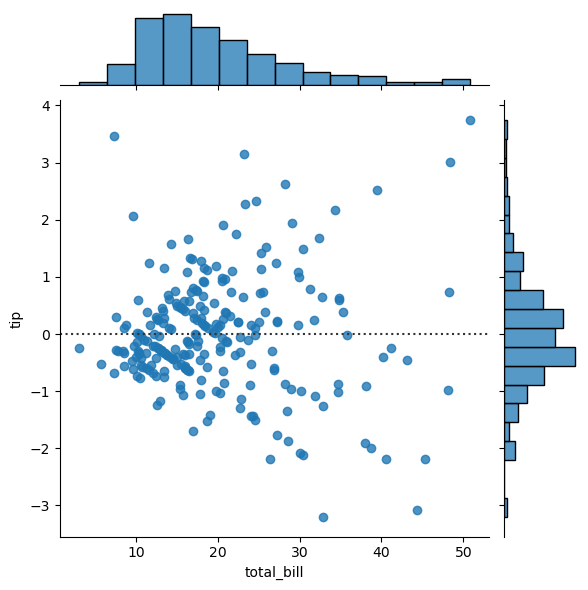

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='resid')

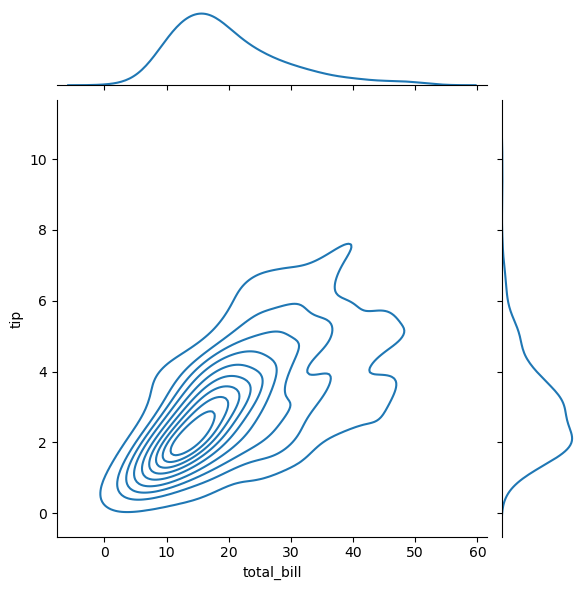

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

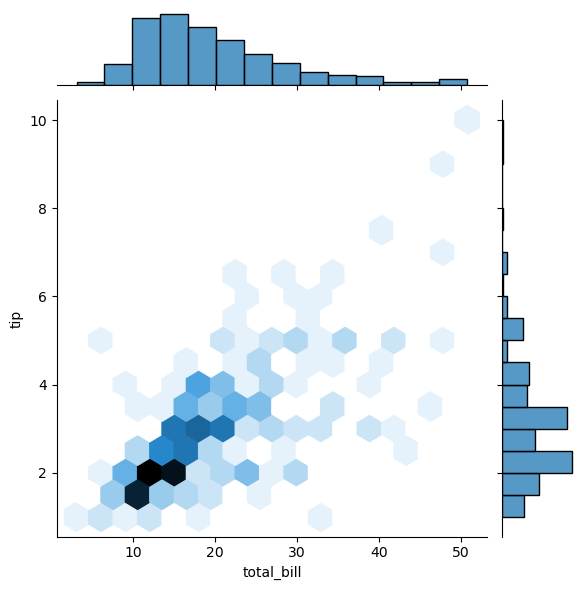

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')